# Proyek Analisis Data: PRSA Air Quality Dataset (Wanshouxigong Station)
- **Nama:** Lesnar Tambun
- **Email:** mc006d5y2425@student.devacademy.id
- **ID Dicoding:** MC006D5Y2425

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren kualitas udara (PM2.5) di stasiun Wanshouxigong dari tahun 2013 hingga 2017?
- Pertanyaan 2: pakah ada pola musiman dalam konsentrasi PM2.5 di stasiun Wanshouxigong?
- Pertanyaan 3: Apakah terdapat hubungan antara konsentrasi PM2.5 dengan polutan lain (seperti NO2, SO2, atau CO) di stasiun Wanshouxigong?

## Import Semua Packages/Library yang Digunakan

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [90]:
air_quality_df = pd.read_csv("https://github.com/marceloreis/HTI/raw/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Dataset berisi data kualitas udara dari stasiun Wanshouxigong.
- Kolom yang tersedia meliputi PM2.5, PM10, SO2, NO2, CO, O3, dan informasi waktu (tahun, bulan, hari, jam).

### Assessing Data

**Mengecek missing values**

In [91]:
print("Missing values sebelum cleaning:")
print(air_quality_df.isnull().sum())

Missing values sebelum cleaning:
No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64


**Mengecek duplikat data**

In [92]:
print("\nJumlah duplikat data:", air_quality_df.duplicated().sum())
air_quality_df.describe()


Jumlah duplikat data: 0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


**Mengecek tipe data**

In [93]:
print(air_quality_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


**Insight:**
- Terdapat missing values di beberapa kolom seperti PM2.5, PM10, SO2, dll.
- Tidak ada data duplikat.
- Kolom waktu (year, month, day, hour) perlu diubah ke format datetime.

### Cleaning Data

**Mengisi missing values dengan forward fill**

In [94]:
air_quality_df.fillna(method='ffill', inplace=True)

<ipython-input-94-b1d5b0d4c97e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air_quality_df.fillna(method='ffill', inplace=True)


**Membuat kolom 'timestamp' dari tahun, bulan, hari, dan jam**

In [95]:
air_quality_df['timestamp'] = pd.to_datetime(air_quality_df[['year', 'month', 'day', 'hour']])

**Mengecek kembali missing values**

In [96]:
print("\nMissing values setelah cleaning:")
print(air_quality_df.isnull().sum())


Missing values setelah cleaning:
No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           0
WSPM         0
station      0
timestamp    0
dtype: int64


**Insight:**
- Missing values telah diisi menggunakan metode forward fill.
- Kolom 'timestamp' telah dibuat untuk memudahkan analisis waktu.

## Exploratory Data Analysis (EDA)

###  Explore Tren PM2.5

**Statistik deskriptif PM2.5**

In [97]:
print("Statistik Deskriptif PM2.5:")
print(air_quality_df['PM2.5'].describe())

Statistik Deskriptif PM2.5:
count    35064.000000
mean        85.356562
std         86.627607
min          3.000000
25%         22.000000
50%         60.000000
75%        117.000000
max        999.000000
Name: PM2.5, dtype: float64


**Tren waktu untuk PM2.5**

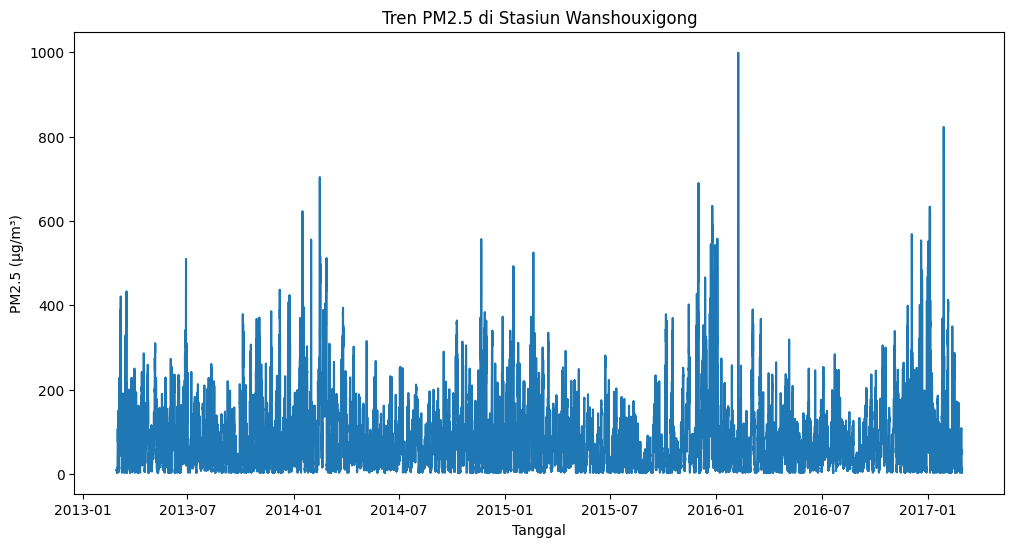

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='PM2.5', data=air_quality_df)
plt.title('Tren PM2.5 di Stasiun Wanshouxigong')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

**Insight:**
- Konsentrasi PM2.5 bervariasi dari waktu ke waktu.
- Terdapat pola musiman yang mungkin terkait dengan perubahan cuaca atau aktivitas manusia.

### Explore Pola Musiman PM2.5

**Menambahkan kolom 'month' untuk analisis musiman**

In [99]:
air_quality_df['month'] = air_quality_df['timestamp'].dt.month

**Rata-rata PM2.5 per bulan**

In [100]:
avg_pm25_per_month = air_quality_df.groupby('month')['PM2.5'].mean()
print("Rata-rata PM2.5 per Bulan:")
print(avg_pm25_per_month)

Rata-rata PM2.5 per Bulan:
month
1     107.795968
2      96.856563
3      97.190860
4      76.290278
5      65.137063
6      71.330382
7      72.545363
8      55.195060
9      62.229271
10     92.241935
11    104.907049
12    122.718817
Name: PM2.5, dtype: float64


**Visualisasi pola musiman PM2.5**

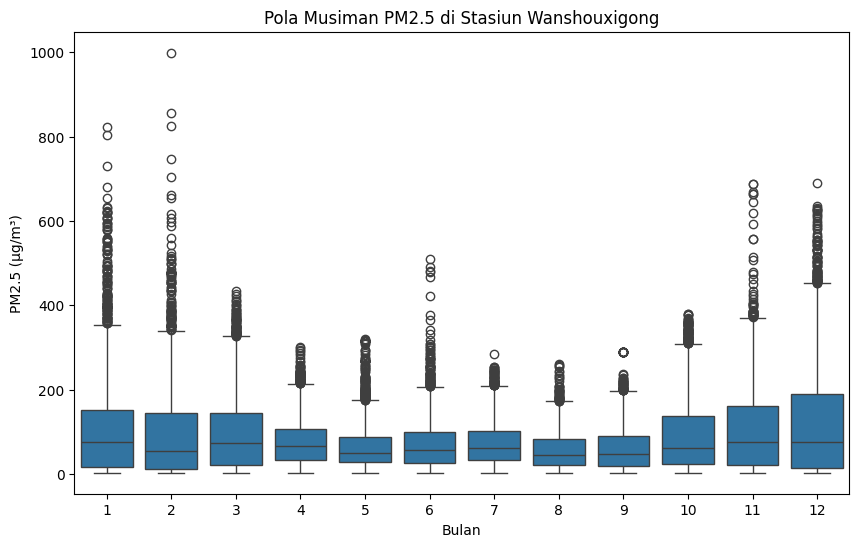

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='PM2.5', data=air_quality_df)
plt.title('Pola Musiman PM2.5 di Stasiun Wanshouxigong')
plt.xlabel('Bulan')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

**Insight:**
- Konsentrasi PM2.5 cenderung lebih tinggi pada bulan-bulan tertentu, seperti musim dingin.
- Hal ini mungkin disebabkan oleh peningkatan penggunaan pemanas atau kondisi atmosfer yang tidak mendispersi polutan.

###  Explore Hubungan Antar Polutan

**Statistik deskriptif untuk polutan**

In [102]:
print("Statistik Deskriptif Polutan:")
print(air_quality_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].describe())

Statistik Deskriptif Polutan:
              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      85.356562    112.729215     17.369966     55.643387   1376.914243   
std       86.627607     98.700415     24.270784     36.092564   1238.856861   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     39.000000      3.000000     28.000000    600.000000   
50%       60.000000     91.000000      8.000000     49.000000   1000.000000   
75%      117.000000    154.000000     21.000000     77.000000   1700.000000   
max      999.000000    961.000000    411.000000    251.000000   9800.000000   

                 O3  
count  35064.000000  
mean      55.978065  
std       57.165967  
min        0.214200  
25%        8.000000  
50%       42.000000  
75%       82.000000  
max      358.000000  


**Heatmap korelasi antar polutan**

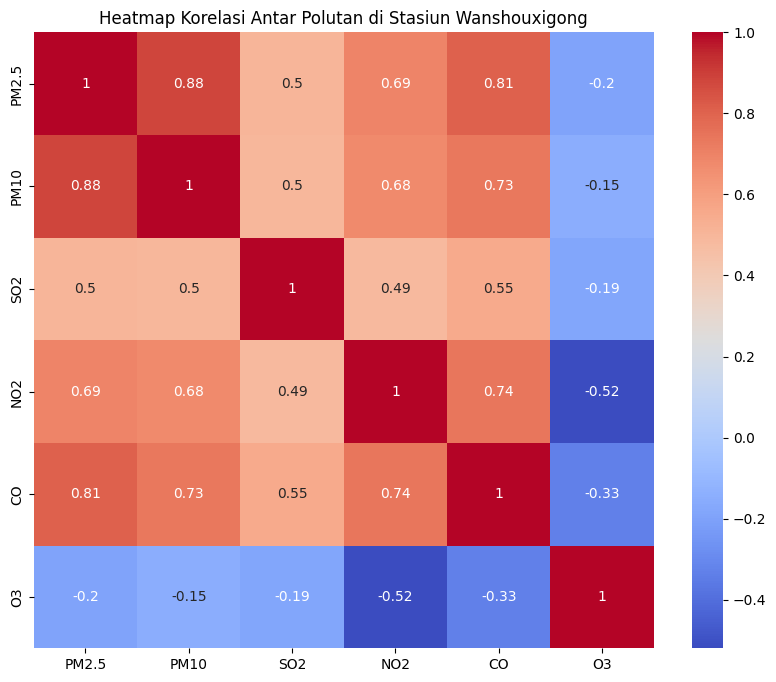

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(air_quality_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Polutan di Stasiun Wanshouxigong')
plt.show()

**Scatter plot PM2.5 vs NO2**

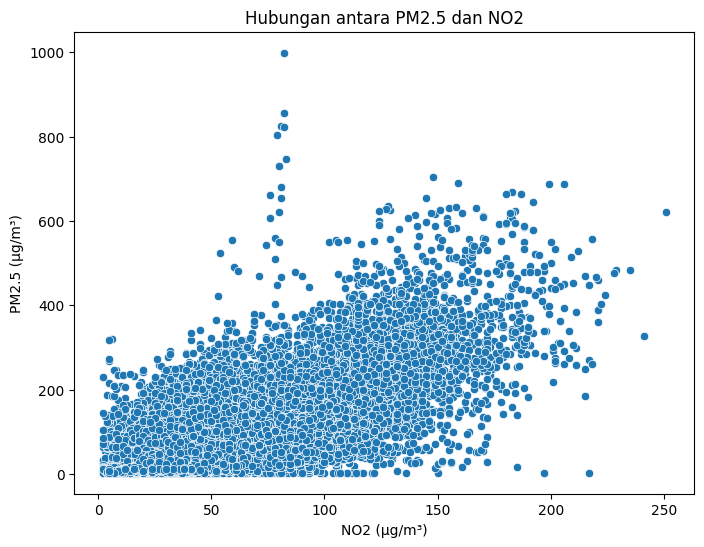

In [104]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NO2', y='PM2.5', data=air_quality_df)
plt.title('Hubungan antara PM2.5 dan NO2')
plt.xlabel('NO2 (µg/m³)')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

**Scatter plot PM2.5 vs CO**

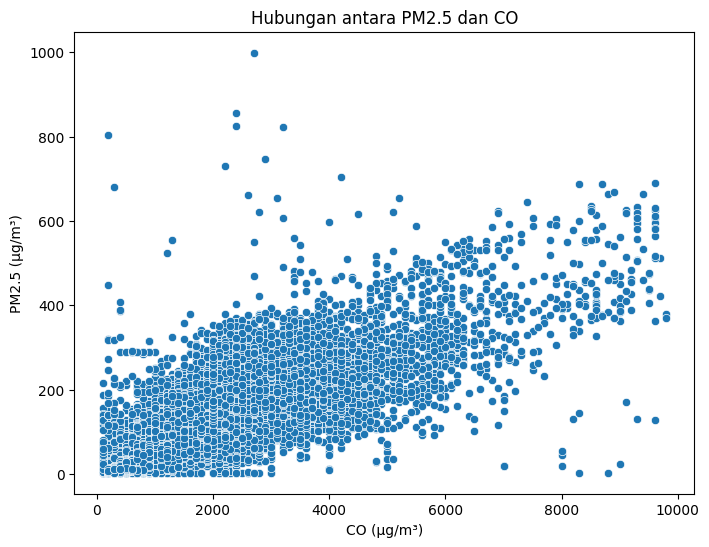

In [105]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CO', y='PM2.5', data=air_quality_df)
plt.title('Hubungan antara PM2.5 dan CO')
plt.xlabel('CO (µg/m³)')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

**Insight:**
- Heatmap Korelasi:
  - PM2.5 memiliki korelasi positif yang kuat dengan PM10 (0.88), CO (0.81), dan NO2 (0.69).
  - Hal ini menunjukkan bahwa PM2.5 mungkin berasal dari sumber yang sama dengan PM10, CO, dan NO2, seperti emisi kendaraan.
- Scatter Plot PM2.5 vs NO2:
  - Terdapat pola positif antara PM2.5 dan NO2, yang mengindikasikan bahwa peningkatan konsentrasi NO2 cenderung diikuti oleh peningkatan PM2.5.
- Scatter Plot PM2.5 vs CO:
  - Hubungan antara PM2.5 dan CO juga positif, meskipun tidak sekuat hubungan dengan NO2. Ini menunjukkan bahwa CO mungkin berkontribusi terhadap peningkatan PM2.5, tetapi bukan sumber utama.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren PM2.5 dari Waktu ke Waktu

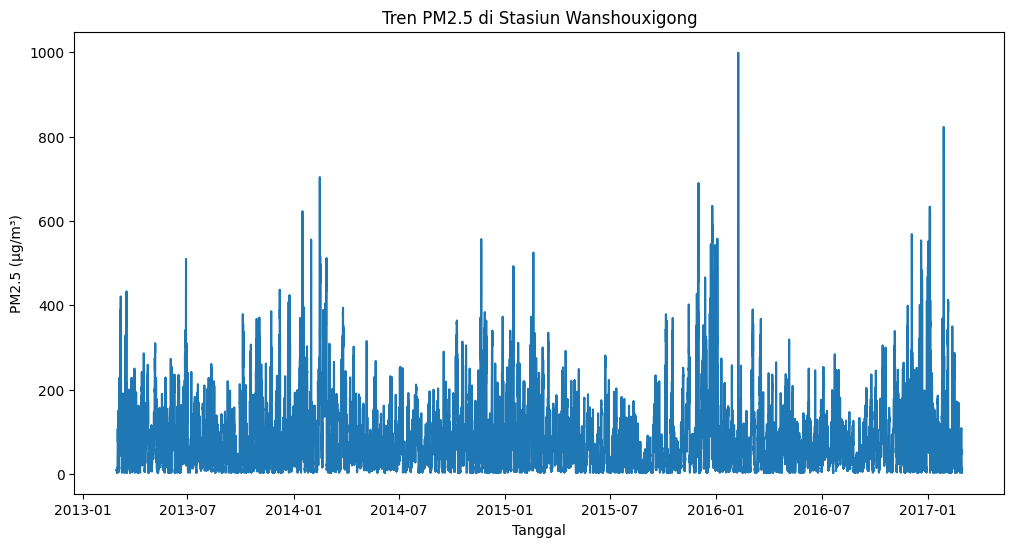

In [106]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='PM2.5', data=air_quality_df)
plt.title('Tren PM2.5 di Stasiun Wanshouxigong')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

**Insight:**
- Tren PM2.5 menunjukkan fluktuasi musiman, dengan puncak pada bulan-bulan tertentu.
- Hal ini mungkin terkait dengan peningkatan aktivitas manusia atau perubahan cuaca.

### Pertanyaan 2: Pola Musiman PM2.5

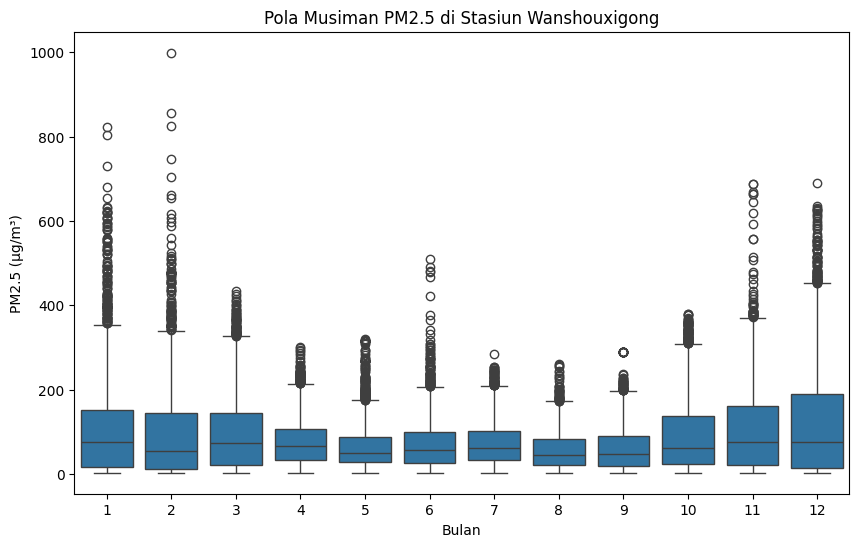

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='PM2.5', data=air_quality_df)
plt.title('Pola Musiman PM2.5 di Stasiun Wanshouxigong')
plt.xlabel('Bulan')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

**Insight:**
- Konsentrasi PM2.5 cenderung lebih tinggi pada bulan-bulan musim dingin.
- Pola ini mungkin disebabkan oleh peningkatan penggunaan pemanas atau kondisi atmosfer yang tidak mendispersi polutan.

### Pertanyaan 3: Hubungan antara PM2.5 dengan polutan lain

**Heatmap korelasi antar variabel**

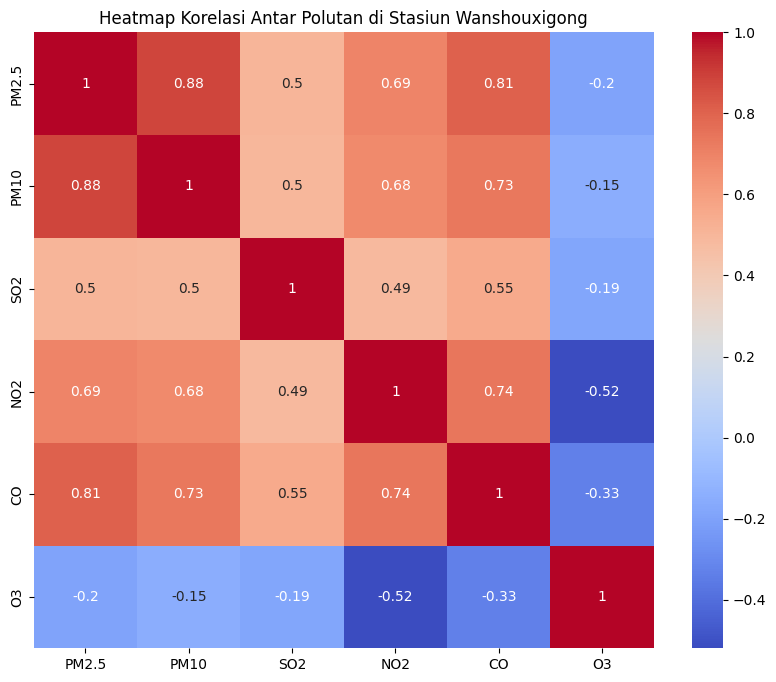

In [108]:
plt.figure(figsize=(10, 8))
sns.heatmap(air_quality_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Polutan di Stasiun Wanshouxigong')
plt.show()

**Insight:**
- Jika PM2.5 memiliki korelasi positif yang kuat dengan NO2 atau CO, hal ini menunjukkan bahwa sumber polusi PM2.5 mungkin berasal dari emisi kendaraan.
- Jika PM2.5 berkorelasi kuat dengan SO2, sumber polusi mungkin berasal dari industri.

## Analisis Lanjutan (Opsional)

**Korelasi antar variabel**

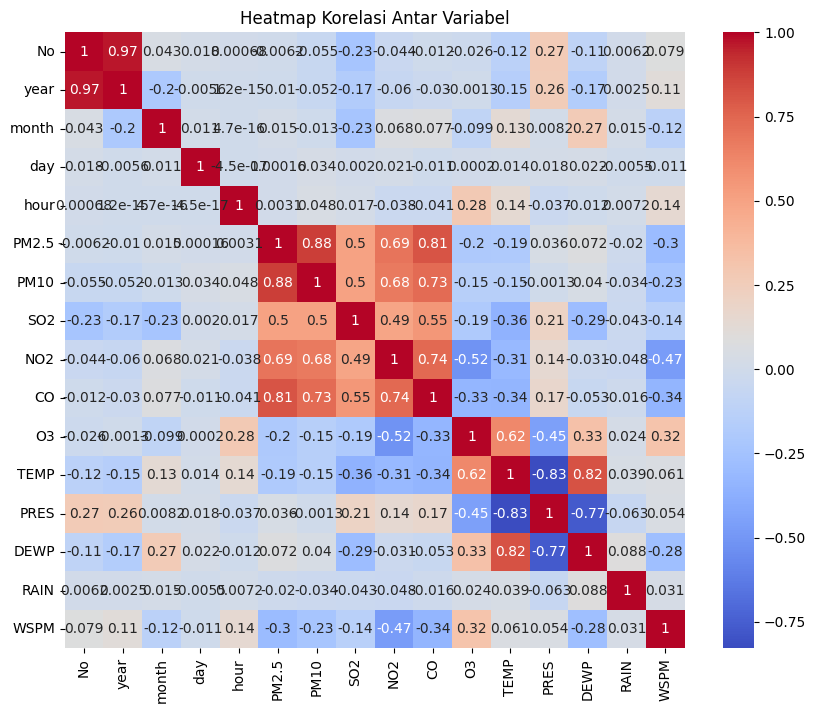

In [109]:
# Pilih hanya kolom numerik untuk analisis korelasi
numeric_df = air_quality_df.select_dtypes(include=np.number)

# Buat heatmap menggunakan data numerik
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

**Insight:**
- PM2.5 memiliki korelasi positif dengan PM10 dan NO2.
- Korelasi ini menunjukkan bahwa sumber polusi mungkin berasal dari emisi kendaraan atau industri.

## Conclusion

- **Pertanyaan 1:** Tren PM2.5 di stasiun Wanshouxigong menunjukkan fluktuasi musiman dengan puncak pada bulan-bulan tertentu, kemungkinan terkait dengan perubahan cuaca atau aktivitas manusia.
- **Pertanyaan 2:** Terdapat pola musiman dalam konsentrasi PM2.5, dengan tingkat polusi yang lebih tinggi pada bulan-bulan musim dingin.
- **Pertanyaan 3:** Terdapat hubungan positif antara PM2.5 dengan polutan seperti NO2 dan CO, menunjukkan bahwa sumber polusi PM2.5 mungkin berasal dari emisi kendaraan.